Capstone Project Crime rates and Venues in Maastricht neighborhoods

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'FGTDAZQLERDAI5RXQDFXJZ5O21ZMZXZFW0MI5QSQSVNPVBH3' # your Foursquare ID
CLIENT_SECRET = 'XP2R05YFJZFBRK5B53IJZHCQUDU15HRVGITJ4NFSX5OTK5XT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FGTDAZQLERDAI5RXQDFXJZ5O21ZMZXZFW0MI5QSQSVNPVBH3
CLIENT_SECRET:XP2R05YFJZFBRK5B53IJZHCQUDU15HRVGITJ4NFSX5OTK5XT


In [3]:
data_maastricht = r'https://www.roeldebeer.com/data_maastricht3.xls'
df_crime = pd.read_excel(data_maastricht)
df_crime.head(5)

,Wijken en buurten,Regioaanduiding|Gemeentenaam,Regioaanduiding|Soort regio,Regioaanduiding|Codering,Regioaanduiding|Indelingswijziging,Regioaanduiding|Aantal inwoners,"Totaal vermogen, vernieling en geweld",Totaal vermogensmisdrijven,"Totaal vernieling, tegen openbare orde",Totaal gewelds- en seksuele misdrijven
0,Maastricht,Maastricht,Gemeente,GM0935,.,122723.0,6791.0,5188.0,866.0,737.0
1,Wijk 00 Centrum,Maastricht,Wijk,WK093500,1,18755.0,2609.0,2126.0,230.0,253.0
2,Binnenstad,Maastricht,Buurt,BU09350000,1,2070.0,896.0,743.0,63.0,90.0
3,Jekerkwartier,Maastricht,Buurt,BU09350001,1,1615.0,327.0,297.0,19.0,11.0
4,Kommelkwartier,Maastricht,Buurt,BU09350002,1,2360.0,108.0,80.0,19.0,9.0


Now let clean up the data and start with dropping the columns that we do not need and set the index. I choose to focus on the total crime categories and not the sub categories (f.e. Theft vs bike theft, residential / non residential burgelery etc) since this will be too detailed for this assignment. 

In [4]:
df_crime.drop(['Regioaanduiding|Gemeentenaam', 'Regioaanduiding|Codering','Regioaanduiding|Indelingswijziging'], axis=1, inplace=True)
df_crime

,Wijken en buurten,Regioaanduiding|Soort regio,Regioaanduiding|Aantal inwoners,"Totaal vermogen, vernieling en geweld",Totaal vermogensmisdrijven,"Totaal vernieling, tegen openbare orde",Totaal gewelds- en seksuele misdrijven
0,Maastricht,Gemeente,122723.0,6791.0,5188.0,866.0,737.0
1,Wijk 00 Centrum,Wijk,18755.0,2609.0,2126.0,230.0,253.0
2,Binnenstad,Buurt,2070.0,896.0,743.0,63.0,90.0
3,Jekerkwartier,Buurt,1615.0,327.0,297.0,19.0,11.0
4,Kommelkwartier,Buurt,2360.0,108.0,80.0,19.0,9.0
5,Statenkwartier,Buurt,3925.0,286.0,188.0,47.0,51.0
6,Boschstraatkwartier,Buurt,1765.0,243.0,198.0,19.0,26.0
7,Sint Maartenspoort,Buurt,1700.0,175.0,136.0,21.0,18.0
8,Wyck,Buurt,5310.0,574.0,484.0,42.0,48.0
9,Wijk 01 Buitenwijk Zuidwest,Wijk,9025.0,311.0,238.0,44.0,29.0


In [5]:
df_crime = df_crime.rename(columns={'Wijken en buurten':'Neighbourhoods','Regioaanduiding|Soort regio': 'Region','Regioaanduiding|Aantal inwoners':'Residents', 'Totaal vermogen, vernieling en geweld':'Total_crimes', 'Totaal vermogensmisdrijven': 'Property_theft', 'Totaal gewelds- en seksuele misdrijven': 'Violence_sex_crimes','Totaal vernieling, tegen openbare orde': 'Vandalism' })
df_crime

,Neighbourhoods,Region,Residents,Total_crimes,Property_theft,Vandalism,Violence_sex_crimes
0,Maastricht,Gemeente,122723.0,6791.0,5188.0,866.0,737.0
1,Wijk 00 Centrum,Wijk,18755.0,2609.0,2126.0,230.0,253.0
2,Binnenstad,Buurt,2070.0,896.0,743.0,63.0,90.0
3,Jekerkwartier,Buurt,1615.0,327.0,297.0,19.0,11.0
4,Kommelkwartier,Buurt,2360.0,108.0,80.0,19.0,9.0
5,Statenkwartier,Buurt,3925.0,286.0,188.0,47.0,51.0
6,Boschstraatkwartier,Buurt,1765.0,243.0,198.0,19.0,26.0
7,Sint Maartenspoort,Buurt,1700.0,175.0,136.0,21.0,18.0
8,Wyck,Buurt,5310.0,574.0,484.0,42.0,48.0
9,Wijk 01 Buitenwijk Zuidwest,Wijk,9025.0,311.0,238.0,44.0,29.0


In [6]:
df_crime.set_index('Neighbourhoods', inplace=True)

In [7]:
df_crime

,Region,Residents,Total_crimes,Property_theft,Vandalism,Violence_sex_crimes
Neighbourhoods,,,,,,
Maastricht,Gemeente,122723.0,6791.0,5188.0,866.0,737.0
Wijk 00 Centrum,Wijk,18755.0,2609.0,2126.0,230.0,253.0
Binnenstad,Buurt,2070.0,896.0,743.0,63.0,90.0
Jekerkwartier,Buurt,1615.0,327.0,297.0,19.0,11.0
Kommelkwartier,Buurt,2360.0,108.0,80.0,19.0,9.0
Statenkwartier,Buurt,3925.0,286.0,188.0,47.0,51.0
Boschstraatkwartier,Buurt,1765.0,243.0,198.0,19.0,26.0
Sint Maartenspoort,Buurt,1700.0,175.0,136.0,21.0,18.0
Wyck,Buurt,5310.0,574.0,484.0,42.0,48.0


Now lets rename the columns in english, so you guys and girls can understand the data a bit better

Now lets lose the total for the entire city of Maastricht and remove the discrict total, so we have a clear view of the absolute numbers per neigbourhood. 

In [8]:
df_crime = df_crime[df_crime.Region == 'Buurt']
df_crime

,Region,Residents,Total_crimes,Property_theft,Vandalism,Violence_sex_crimes
Neighbourhoods,,,,,,
Binnenstad,Buurt,2070.0,896.0,743.0,63.0,90.0
Jekerkwartier,Buurt,1615.0,327.0,297.0,19.0,11.0
Kommelkwartier,Buurt,2360.0,108.0,80.0,19.0,9.0
Statenkwartier,Buurt,3925.0,286.0,188.0,47.0,51.0
Boschstraatkwartier,Buurt,1765.0,243.0,198.0,19.0,26.0
Sint Maartenspoort,Buurt,1700.0,175.0,136.0,21.0,18.0
Wyck,Buurt,5310.0,574.0,484.0,42.0,48.0
Villapark,Buurt,3280.0,82.0,69.0,9.0,4.0
Jekerdal,Buurt,1235.0,65.0,33.0,17.0,15.0


Exploratory Analysis 
Statistical summary of crimes
The describe function in python is used to get statistics of the Maastricht Crime Rate, this
returns the mean, standard deviation, minimum, maximum, 1st quartile (25%), 2nd quartile
(50%), and the 3rd quartile (75%) for each of the major categories of crime 

In [9]:
df_crime.describe()

,Residents,Total_crimes,Property_theft,Vandalism,Violence_sex_crimes
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2787.045455,154.340909,117.909091,19.681818,16.750000
std,2142.021790,166.578698,137.400250,17.355078,18.020821
min,20.000000,2.000000,2.000000,0.000000,0.000000
25%,1378.750000,46.500000,37.750000,4.750000,2.000000
50%,2070.000000,102.000000,76.500000,18.000000,13.500000
75%,4086.250000,200.250000,145.000000,30.000000,24.500000
max,7535.000000,896.000000,743.000000,73.000000,90.000000


In [10]:
from matplotlib import pyplot as plt

In [11]:
df_top5 = df_crime.sort_values(by=['Total_crimes'], ascending=False).head(5)
df_top5

,Region,Residents,Total_crimes,Property_theft,Vandalism,Violence_sex_crimes
Neighbourhoods,,,,,,
Binnenstad,Buurt,2070.0,896.0,743.0,63.0,90.0
Wyck,Buurt,5310.0,574.0,484.0,42.0,48.0
Wittevrouwenveld,Buurt,5465.0,447.0,327.0,73.0,47.0
Jekerkwartier,Buurt,1615.0,327.0,297.0,19.0,11.0
Statenkwartier,Buurt,3925.0,286.0,188.0,47.0,51.0


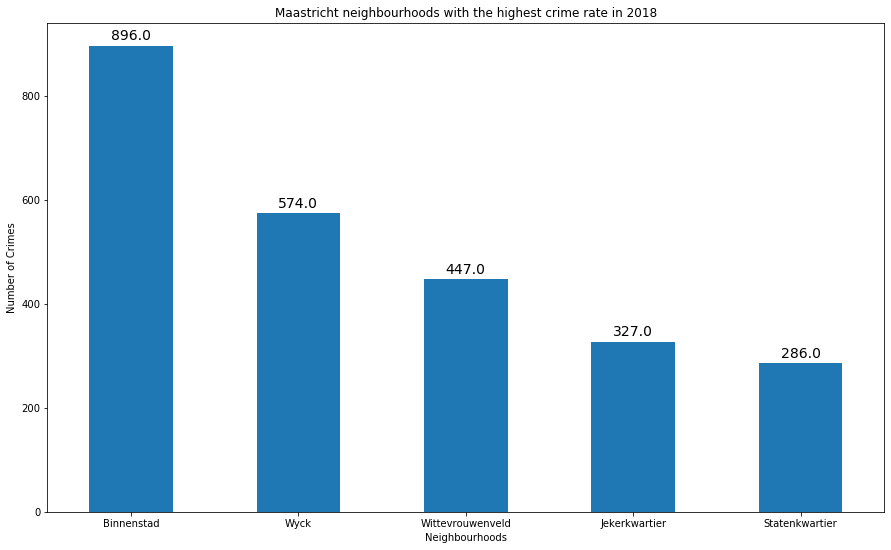

In [12]:
df_tt = df_top5.Total_crimes.head(5)

ax = df_tt.plot(kind='bar', figsize=(15, 9), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighbourhoods') # add y-label to the plot
ax.set_title('Maastricht neighbourhoods with the highest crime rate in 2018') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

Now lets check out the top 5 of neighborhoods with the lowest total crimes (absolute)

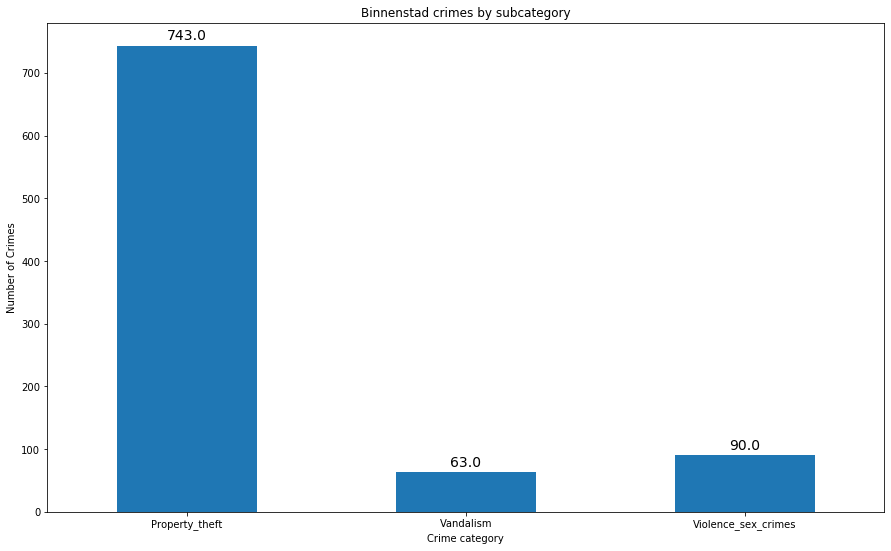

In [13]:
df_top5.drop(['Region', 'Residents', 'Total_crimes'], axis=1, inplace=True)

df_binnenstad = df_top5.loc["Binnenstad"] 

ax = df_binnenstad.plot(kind='bar', figsize=(15, 9), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Crime category') # add y-label to the plot
ax.set_title('Binnenstad crimes by subcategory') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [14]:
df_low5 = df_crime.sort_values(by=['Total_crimes'], ascending=True).head(5)
df_low5

,Region,Residents,Total_crimes,Property_theft,Vandalism,Violence_sex_crimes
Neighbourhoods,,,,,,
Lanakerveld,Buurt,70.0,2.0,2.0,0.0,0.0
Meerssenhoven,Buurt,25.0,10.0,9.0,0.0,1.0
Itteren,Buurt,915.0,12.0,8.0,2.0,2.0
Campagne,Buurt,1270.0,13.0,9.0,3.0,1.0
Belvédère,Buurt,25.0,14.0,11.0,2.0,1.0


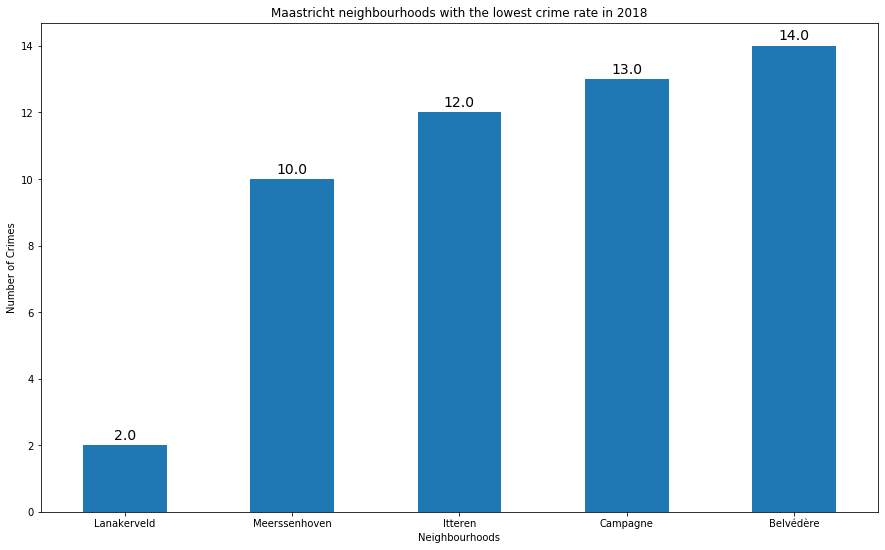

In [15]:
df_low = df_low5.Total_crimes.head(5)

ax = df_low.plot(kind='bar', figsize=(15, 9), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighbourhoods') # add y-label to the plot
ax.set_title('Maastricht neighbourhoods with the lowest crime rate in 2018') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

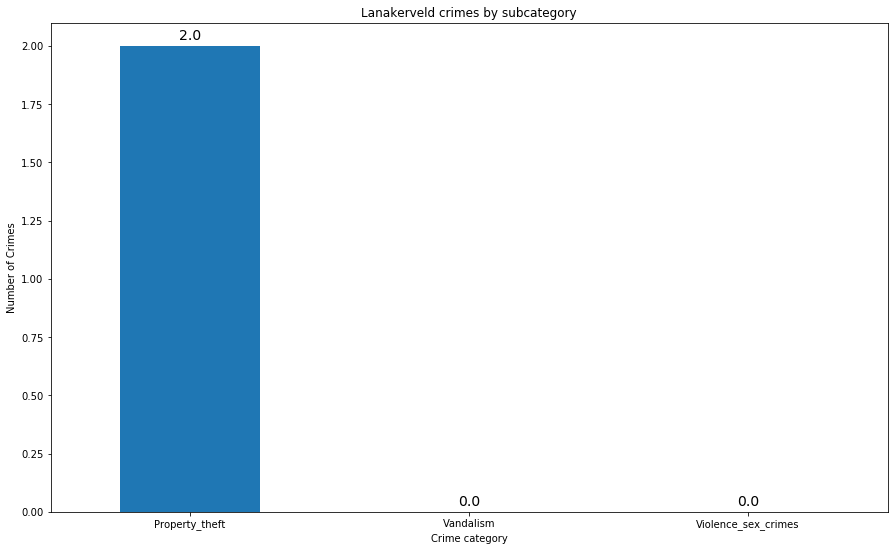

In [16]:
df_low5.drop(['Region', 'Residents', 'Total_crimes'], axis=1, inplace=True)

df_Lanakerveld = df_low5.loc["Lanakerveld"] 

ax = df_Lanakerveld.plot(kind='bar', figsize=(15, 9), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Crime category') # add y-label to the plot
ax.set_title('Lanakerveld crimes by subcategory') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

The safest neigborhoods in Maastricht and generating their co-ordinates.

In [17]:
Neighborhood = ['Lanakerveld','Meerssenhoven','Itteren','Campagne','Belvedere']

Latitude = ['','','','','']
Longitude = ['','','','','']

df_neighborhood = {'Neighborhood': Neighborhood,'Latitude': Latitude,'Longitude':Longitude}
geo_neighborhood = pd.DataFrame(data=df_neighborhood, columns=['Neighborhood', 'Latitude', 'Longitude'], index=None)

geo_neighborhood

,Neighborhood,Latitude,Longitude
0,Lanakerveld,,
1,Meerssenhoven,,
2,Itteren,,
3,Campagne,,
4,Belvedere,,


In [18]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [19]:
from geopy.geocoders import Nominatim

In [20]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},Maastricht,Netherlands'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="toronto_explorer")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[50.87043, 50.8843675, 50.8977326, 50.8369784, 50.8718373] [5.66959, 5.723069, 5.70293, 5.6631735, 5.6765147]


In [21]:
df_neighborhood = {'Neighborhood': Neighborhood,'Latitude': Latitude,'Longitude':Longitude}
geo_neighborhood = pd.DataFrame(data=df_neighborhood, columns=['Neighborhood','Latitude', 'Longitude'], index=None)

geo_neighborhood

,Neighborhood,Latitude,Longitude
0,Lanakerveld,50.870430,5.669590
1,Meerssenhoven,50.884368,5.723069
2,Itteren,50.897733,5.702930
3,Campagne,50.836978,5.663174
4,Belvedere,50.871837,5.676515


In [22]:
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of New York using latitude and longitude values
maastricht_plot = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(geo_neighborhood['Latitude'], geo_neighborhood['Longitude'], geo_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00c31c',
        fill_opacity=0.7,
        parse_html=False).add_to(maastricht_plot)  
    
maastricht_plot

Now let see what the vendues are in the all the neighbourhoods of Maastricht

In [23]:
All_Neighborhoods = ['Binnenstad', 'Jekerkwartier', 'Kommelkwartier', 'Statenkwartier', 'Boschstraatkwartier', 'Sint Maartenspoort', 'Wyck', 'Villapark', 'Jekerdal', 'Campagne', 'Wolder', 'Sint Pieter', 'Brusselsepoort', 'Mariaberg', 'Belfort', 'Pottenberg', 'Malpertuis', 'Caberg', 'Oud-Caberg', 'Malberg', 'Dousberg-Hazendans', 'Daalhof',
'Boschpoort', 'Bosscherveld', 'Frontenkwartier', 'Belvédère', 'Lanakerveld', 'Wyckerpoort', 'Heugemerveld', 'Wittevrouwenveld','Nazareth', 'Limmel',
'Scharn', 'Amby', 'Beatrixhaven', 'Borgharen', 'Itteren', 'Meerssenhoven', 'Randwyck', 'Heugem', 'Heer', 'De Heeg', 'Vroendaal', 'Biesland']

All_Latitude = ['','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
All_Longitude = ['','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']

df_All_Neighborhoods = {'Neighborhood': All_Neighborhoods,'Latitude': All_Latitude,'Longitude':All_Longitude}
geo_All_Neighborhoods = pd.DataFrame(data=df_All_Neighborhoods, columns=['Neighborhood', 'Latitude', 'Longitude'], index=None)

geo_All_Neighborhoods

,Neighborhood,Latitude,Longitude
0,Binnenstad,,
1,Jekerkwartier,,
2,Kommelkwartier,,
3,Statenkwartier,,
4,Boschstraatkwartier,,
5,Sint Maartenspoort,,
6,Wyck,,
7,Villapark,,
8,Jekerdal,,
9,Campagne,,


In [24]:
All_Latitude  = []
All_Longitude = []

for i in range(len(All_Neighborhoods)):
    address = '{},Maastricht,Netherlands'.format(All_Neighborhoods[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    All_Latitude.append(location.latitude)
    All_Longitude.append(location.longitude)
print(All_Latitude, All_Longitude)

[50.8492705, 50.84492, 50.8472428, 50.8523379, 50.8540425, 50.8528451, 50.8472896, 50.8388699, 50.8388469, 50.8369784, 50.8344639, 50.8316335, 50.8512146, 50.8441383, 50.8462929, 50.8526553, 50.858362, 50.8594043, 50.8655914, 50.8613574, 50.8497646, 50.8413155, 50.8640467, 50.8627615, 50.8541648, 50.8718373, 50.87043, 50.850862, 50.8429839, 50.853247, 50.8635551, 50.8658134, 50.8478734, 50.8617921, 50.8841069, 50.8786076, 50.8977326, 50.8843675, 50.8358782, 50.8295737, 50.8398326, 50.8262293, 50.832125, 50.8399137] [5.6887558, 5.6905467, 5.6827639, 5.6869772, 5.6919184, 5.7007116, 5.7025267, 5.6926445, 5.6843085, 5.6631735, 5.6543796, 5.6936373, 5.6695189, 5.6717111, 5.6603091, 5.6576836, 5.6618583, 5.671216, 5.6636614, 5.6557682, 5.6468293, 5.6537034, 5.6902026, 5.683250012589841, 5.6825271, 5.6765147, 5.66959, 5.7083244, 5.7094389, 5.7162972, 5.7140113, 5.7080255, 5.7237522, 5.7319121, 5.7168555, 5.6883533, 5.70293, 5.723069, 5.7104391, 5.7060422, 5.7245949, 5.7243125, 5.7308602, 5.6

In [25]:
df_All_Neighborhoods = {'Neighborhood': All_Neighborhoods,'Latitude': All_Latitude,'Longitude':All_Longitude}
geo_All_Neighborhoods = pd.DataFrame(data=df_All_Neighborhoods, columns=['Neighborhood', 'Latitude', 'Longitude'], index=None)

geo_All_Neighborhoods

,Neighborhood,Latitude,Longitude
0,Binnenstad,50.849271,5.688756
1,Jekerkwartier,50.844920,5.690547
2,Kommelkwartier,50.847243,5.682764
3,Statenkwartier,50.852338,5.686977
4,Boschstraatkwartier,50.854042,5.691918
5,Sint Maartenspoort,50.852845,5.700712
6,Wyck,50.847290,5.702527
7,Villapark,50.838870,5.692645
8,Jekerdal,50.838847,5.684309
9,Campagne,50.836978,5.663174


In [26]:
def getNearbyVenues(names, All_latitudes, All_longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, All_latitudes, All_longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
geo_venues = getNearbyVenues(names=geo_All_Neighborhoods['Neighborhood'],
                                   All_latitudes=geo_All_Neighborhoods['Latitude'],
                                   All_longitudes=geo_All_Neighborhoods['Longitude']
                                  )


geo_venues


Binnenstad
Jekerkwartier
Kommelkwartier
Statenkwartier
Boschstraatkwartier
Sint Maartenspoort
Wyck
Villapark
Jekerdal
Campagne
Wolder
Sint Pieter
Brusselsepoort
Mariaberg
Belfort
Pottenberg
Malpertuis
Caberg
Oud-Caberg
Malberg
Dousberg-Hazendans
Daalhof
Boschpoort
Bosscherveld
Frontenkwartier
Belvédère
Lanakerveld
Wyckerpoort
Heugemerveld
Wittevrouwenveld
Nazareth
Limmel
Scharn
Amby
Beatrixhaven
Borgharen
Itteren
Meerssenhoven
Randwyck
Heugem
Heer
De Heeg
Vroendaal
Biesland


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binnenstad,50.849271,5.688756,Boekhandel Dominicanen,50.850129,5.689706,Bookstore
1,Binnenstad,50.849271,5.688756,Vrijthof,50.849295,5.689001,Plaza
2,Binnenstad,50.849271,5.688756,Il Bacaro,50.848495,5.689203,Italian Restaurant
3,Binnenstad,50.849271,5.688756,La Bodega Tapas,50.848803,5.690020,Tapas Restaurant
4,Binnenstad,50.849271,5.688756,Theater aan het Vrijthof,50.850147,5.688010,Theater
...,...,...,...,...,...,...,...
471,Vroendaal,50.832125,5.730860,Bloemen Lelieveld,50.828179,5.728474,Flower Shop
472,Biesland,50.839914,5.672686,Saint Servais,50.837345,5.671984,French Restaurant
473,Biesland,50.839914,5.672686,il fiore Mariaberg,50.844178,5.671180,Gym
474,Biesland,50.839914,5.672686,Prix De Rome,50.837430,5.671901,Café


In [28]:
print(geo_venues.shape)
geo_venues

(476, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binnenstad,50.849271,5.688756,Boekhandel Dominicanen,50.850129,5.689706,Bookstore
1,Binnenstad,50.849271,5.688756,Vrijthof,50.849295,5.689001,Plaza
2,Binnenstad,50.849271,5.688756,Il Bacaro,50.848495,5.689203,Italian Restaurant
3,Binnenstad,50.849271,5.688756,La Bodega Tapas,50.848803,5.690020,Tapas Restaurant
4,Binnenstad,50.849271,5.688756,Theater aan het Vrijthof,50.850147,5.688010,Theater
...,...,...,...,...,...,...,...
471,Vroendaal,50.832125,5.730860,Bloemen Lelieveld,50.828179,5.728474,Flower Shop
472,Biesland,50.839914,5.672686,Saint Servais,50.837345,5.671984,French Restaurant
473,Biesland,50.839914,5.672686,il fiore Mariaberg,50.844178,5.671180,Gym
474,Biesland,50.839914,5.672686,Prix De Rome,50.837430,5.671901,Café


In [29]:
geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
All_latitudes = location.latitude
All_longitudes = location.longitude

# create map of New York using latitude and longitude values
maastricht_map = folium.Map(location=[All_latitudes, All_longitudes], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(geo_venues['Venue Latitude'], geo_venues['Venue Longitude'], geo_venues['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(maastricht_plot)  
    
maastricht_plot

In [30]:
geo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amby,11,11,11,11,11,11
Beatrixhaven,1,1,1,1,1,1
Belfort,4,4,4,4,4,4
Belvédère,1,1,1,1,1,1
Biesland,4,4,4,4,4,4
Binnenstad,30,30,30,30,30,30
Borgharen,4,4,4,4,4,4
Boschpoort,5,5,5,5,5,5
Boschstraatkwartier,30,30,30,30,30,30


Broadening out the definition of safe neighborhoods (lower than mean)

In [31]:
df_mean = df_crime.Total_crimes < 154
df_safest = df_mean == True
df_safest

Neighbourhoods
Binnenstad             False
Jekerkwartier          False
Kommelkwartier          True
Statenkwartier         False
Boschstraatkwartier    False
Sint Maartenspoort     False
Wyck                   False
Villapark               True
Jekerdal                True
Biesland                True
Campagne                True
Wolder                  True
Sint Pieter             True
Brusselsepoort         False
Mariaberg              False
Belfort                 True
Pottenberg              True
Malpertuis              True
Caberg                 False
Oud-Caberg              True
Malberg                False
Dousberg-Hazendans      True
Daalhof                 True
Boschpoort              True
Bosscherveld            True
Frontenkwartier         True
Belvédère               True
Lanakerveld             True
Wyckerpoort             True
Heugemerveld            True
Wittevrouwenveld       False
Nazareth               False
Limmel                  True
Scharn                 False

In [32]:
Safe_Neighborhood_broad = ['Kommelkwartier', 'Villapark', 'Jekerdal', 'Biesland', 'Campagne', 'Wolder', 'Sint Pieter', 'Belfort', 'Pottenberg', 'Malpertuis', 'Oud-Caberg', 'Dousberg-Hazendans', 'Daalhof', 'Boschpoort', 'Bosscherveld', 'Frontenkwartier', 'Belvédère', 'Lanakerveld', 'Wyckerpoort', 'Heugemerveld', 'Limmel', 'Beatrixhaven', 'Borgharen', 'Itteren', 'Meerssenhoven', 'Heugem', 'Vroendaal']

Broad_Latitude = ['','','','','','','','','','','','','','','','','','','','','','','','','','','']
Broad_Longitude = ['','','','','','','','','','','','','','','','','','','','','','','','','','','']

df_Safe_Neighborhood_broad = {'Neighborhood': Safe_Neighborhood_broad,'Latitude': Broad_Latitude,'Longitude':Broad_Longitude}
geo_Safe_Neighborhood_broad = pd.DataFrame(data=df_Safe_Neighborhood_broad, columns=['Neighborhood', 'Latitude', 'Longitude'], index=None)

geo_Safe_Neighborhood_broad

,Neighborhood,Latitude,Longitude
0,Kommelkwartier,,
1,Villapark,,
2,Jekerdal,,
3,Biesland,,
4,Campagne,,
5,Wolder,,
6,Sint Pieter,,
7,Belfort,,
8,Pottenberg,,
9,Malpertuis,,


In [33]:
Broad_Latitude = []
Broad_Longitude = []

for i in range(len(Safe_Neighborhood_broad)):
    address = '{},Maastricht,Netherlands'.format(Safe_Neighborhood_broad[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Broad_Latitude.append(location.latitude)
    Broad_Longitude.append(location.longitude)
print(Broad_Latitude, Broad_Longitude)



[50.8472428, 50.8388699, 50.8388469, 50.8399137, 50.8369784, 50.8344639, 50.8316335, 50.8462929, 50.8526553, 50.858362, 50.8655914, 50.8497646, 50.8413155, 50.8640467, 50.8627615, 50.8541648, 50.8718373, 50.87043, 50.850862, 50.8429839, 50.8658134, 50.8841069, 50.8786076, 50.8977326, 50.8843675, 50.8295737, 50.832125] [5.6827639, 5.6926445, 5.6843085, 5.6726863, 5.6631735, 5.6543796, 5.6936373, 5.6603091, 5.6576836, 5.6618583, 5.6636614, 5.6468293, 5.6537034, 5.6902026, 5.683250012589841, 5.6825271, 5.6765147, 5.66959, 5.7083244, 5.7094389, 5.7080255, 5.7168555, 5.6883533, 5.70293, 5.723069, 5.7060422, 5.7308602]


In [34]:
df_Safe_Neighborhood_broad = {'Neighborhood': Safe_Neighborhood_broad,'Latitude': Broad_Latitude,'Longitude':Broad_Longitude}
geo_Safe_Neighborhood_broad = pd.DataFrame(data=df_Safe_Neighborhood_broad, columns=['Neighborhood', 'Latitude', 'Longitude'], index=None)

geo_Safe_Neighborhood_broad

,Neighborhood,Latitude,Longitude
0,Kommelkwartier,50.847243,5.682764
1,Villapark,50.838870,5.692645
2,Jekerdal,50.838847,5.684309
3,Biesland,50.839914,5.672686
4,Campagne,50.836978,5.663174
5,Wolder,50.834464,5.654380
6,Sint Pieter,50.831634,5.693637
7,Belfort,50.846293,5.660309
8,Pottenberg,50.852655,5.657684
9,Malpertuis,50.858362,5.661858


Plotting the Broader safer Neighborhoods

In [35]:
geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(geo_Safe_Neighborhood_broad['Latitude'], geo_Safe_Neighborhood_broad['Longitude'], geo_Safe_Neighborhood_broad['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00c31c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [36]:
def getNearbyVenues(names, Broad_latitudes, Broad_longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, Broad_latitudes, Broad_longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
geo_broad_venues = getNearbyVenues(names=geo_Safe_Neighborhood_broad['Neighborhood'],
                                   Broad_latitudes=geo_Safe_Neighborhood_broad['Latitude'],
                                   Broad_longitudes=geo_Safe_Neighborhood_broad['Longitude']
                                  )

Kommelkwartier
Villapark
Jekerdal
Biesland
Campagne
Wolder
Sint Pieter
Belfort
Pottenberg
Malpertuis
Oud-Caberg
Dousberg-Hazendans
Daalhof
Boschpoort
Bosscherveld
Frontenkwartier
Belvédère
Lanakerveld
Wyckerpoort
Heugemerveld
Limmel
Beatrixhaven
Borgharen
Itteren
Meerssenhoven
Heugem
Vroendaal


In [38]:
print(geo_broad_venues.shape)
geo_broad_venues

(185, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kommelkwartier,50.847243,5.682764,Kruisherenhotel Maastricht,50.848672,5.683570,Hotel
1,Kommelkwartier,50.847243,5.682764,Piano B Pizzeria,50.846224,5.686503,Pizza Place
2,Kommelkwartier,50.847243,5.682764,Mandalin Meze Bar&Türk Restaurant,50.849047,5.684531,Turkish Restaurant
3,Kommelkwartier,50.847243,5.682764,Café de Tribunal,50.846470,5.687490,Pub
4,Kommelkwartier,50.847243,5.682764,MAC Maastricht Athletic Club,50.850041,5.682131,Gym
...,...,...,...,...,...,...,...
180,Heugem,50.829574,5.706042,The Read Shop,50.832098,5.703857,Bookstore
181,Vroendaal,50.832125,5.730860,Jan Linders de Heeg,50.828018,5.728439,Convenience Store
182,Vroendaal,50.832125,5.730860,Sportzaal 2 Porta Mosana College,50.834171,5.732721,Athletics & Sports
183,Vroendaal,50.832125,5.730860,Hellas Dakwerken,50.829850,5.728970,Construction & Landscaping


In [39]:
geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
Broad_latitude = location.latitude
Broad_longitude = location.longitude

# create map of New York using latitude and longitude values
map_venue = folium.Map(location=[Broad_latitude, Broad_longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(geo_broad_venues['Venue Latitude'], geo_broad_venues['Venue Longitude'], geo_broad_venues['Venue']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [40]:
geo_broad_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beatrixhaven,1,1,1,1,1,1
Belfort,4,4,4,4,4,4
Belvédère,1,1,1,1,1,1
Biesland,4,4,4,4,4,4
Borgharen,4,4,4,4,4,4
Boschpoort,5,5,5,5,5,5
Bosscherveld,4,4,4,4,4,4
Campagne,4,4,4,4,4,4
Daalhof,10,10,10,10,10,10


In [41]:
print('There are {} uniques categories.'.format(len(geo_broad_venues['Venue Category'].unique())))

There are 96 uniques categories.


In [42]:
# one hot encoding
geo_onehot = pd.get_dummies(geo_broad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
geo_onehot['Neighborhood'] = geo_broad_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [geo_onehot.columns[-1]] + list(geo_onehot.columns[:-1])
geo_onehot = geo_onehot[fixed_columns]

geo_onehot.head(5)

,Neighborhood,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bar,Bed & Breakfast,...,Supermarket,Tennis Court,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,Kommelkwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kommelkwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kommelkwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Kommelkwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kommelkwartier,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
geo_grouped = geo_onehot.groupby('Neighborhood').mean().reset_index()
geo_grouped

,Neighborhood,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,Bakery,Bar,Bed & Breakfast,...,Supermarket,Tennis Court,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store
0,Beatrixhaven,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Belfort,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Belvédère,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Biesland,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Borgharen,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.25,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,Boschpoort,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Bosscherveld,0.000000,0.000000,0.000000,0.000000,0.00,0.25,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25
7,Campagne,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Daalhof,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.100000,0.000000,0.00,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Dousberg-Hazendans,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [44]:
geo_grouped.shape

(27, 97)

In [45]:
num_top_venues = 5

for hood in geo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = geo_grouped[geo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beatrixhaven----
                   venue  freq
0                   Farm   1.0
1                 Arcade   0.0
2              Juice Bar   0.0
3  Performing Arts Venue   0.0
4                   Park   0.0


----Belfort----
                     venue  freq
0    Performing Arts Venue  0.25
1  Health & Beauty Service  0.25
2       Country Dance Club  0.25
3              Supermarket  0.25
4                Juice Bar  0.00


----Belvédère----
                   venue  freq
0             Campground   1.0
1                 Arcade   0.0
2            Pizza Place   0.0
3  Performing Arts Venue   0.0
4                   Park   0.0


----Biesland----
               venue  freq
0              Plaza  0.25
1                Gym  0.25
2  French Restaurant  0.25
3               Café  0.25
4       Liquor Store  0.00


----Borgharen----
                   venue  freq
0  Outdoors & Recreation  0.25
1      Food & Drink Shop  0.25
2               Bus Stop  0.25
3        Bed & Breakfast  0.25
4              

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = geo_grouped['Neighborhood']

for ind in np.arange(geo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(geo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beatrixhaven,Farm,Women's Store,Deli / Bodega,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
1,Belfort,Health & Beauty Service,Supermarket,Performing Arts Venue,Country Dance Club,Women's Store,Dance Studio,Cave,Chinese Restaurant,Clothing Store,Coffee Shop
2,Belvédère,Campground,Cave,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club
3,Biesland,French Restaurant,Café,Plaza,Gym,Women's Store,Dance Studio,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping
4,Borgharen,Outdoors & Recreation,Food & Drink Shop,Bus Stop,Bed & Breakfast,Women's Store,Dance Studio,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping


In [49]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

geo_grouped_clustering = geo_grouped.drop('Neighborhood', 1)

# run k-means clustering
Geo_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(geo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
Geo_kmeans.labels_[0:10]

array([4, 3, 0, 3, 3, 3, 3, 3, 3, 1], dtype=int32)

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', Geo_kmeans.labels_)

geo_merged = geo_Safe_Neighborhood_broad

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
geo_merged = geo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

geo_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kommelkwartier,50.847243,5.682764,3,Italian Restaurant,Coffee Shop,Hotel,French Restaurant,Pub,Dance Studio,Plaza,Buffet,Restaurant,Park
1,Villapark,50.838870,5.692645,3,Vegetarian / Vegan Restaurant,Gastropub,Coffee Shop,Bakery,Restaurant,Women's Store,Dance Studio,Chinese Restaurant,Clothing Store,Concert Hall
2,Jekerdal,50.838847,5.684309,3,Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Café,Cave,Trail,Scenic Lookout,Historic Site,Tennis Court,Bakery
3,Biesland,50.839914,5.672686,3,French Restaurant,Café,Plaza,Gym,Women's Store,Dance Studio,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping
4,Campagne,50.836978,5.663174,3,Food Truck,Concert Hall,Salsa Club,Hotel Bar,Deli / Bodega,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store


In [51]:
geo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            27 non-null     object 
 1   Latitude                27 non-null     float64
 2   Longitude               27 non-null     float64
 3   Cluster Labels          27 non-null     int32  
 4   1st Most Common Venue   27 non-null     object 
 5   2nd Most Common Venue   27 non-null     object 
 6   3rd Most Common Venue   27 non-null     object 
 7   4th Most Common Venue   27 non-null     object 
 8   5th Most Common Venue   27 non-null     object 
 9   6th Most Common Venue   27 non-null     object 
 10  7th Most Common Venue   27 non-null     object 
 11  8th Most Common Venue   27 non-null     object 
 12  9th Most Common Venue   27 non-null     object 
 13  10th Most Common Venue  27 non-null     object 
dtypes: float64(2), int32(1), object(11)
memory u

In [53]:
# Dropping the row with the NaN value 
geo_merged.dropna(inplace = True)

In [56]:
geo_merged['Cluster Labels'] = geo_merged['Cluster Labels'].astype(int)

In [58]:
geo_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            27 non-null     object 
 1   Latitude                27 non-null     float64
 2   Longitude               27 non-null     float64
 3   Cluster Labels          27 non-null     int64  
 4   1st Most Common Venue   27 non-null     object 
 5   2nd Most Common Venue   27 non-null     object 
 6   3rd Most Common Venue   27 non-null     object 
 7   4th Most Common Venue   27 non-null     object 
 8   5th Most Common Venue   27 non-null     object 
 9   6th Most Common Venue   27 non-null     object 
 10  7th Most Common Venue   27 non-null     object 
 11  8th Most Common Venue   27 non-null     object 
 12  9th Most Common Venue   27 non-null     object 
 13  10th Most Common Venue  27 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory u

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium.plugins import HeatMap

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(geo_merged['Latitude'], geo_merged['Longitude'], geo_merged['Neighborhood'], geo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [62]:
geo_merged[geo_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Belvédère,50.871837,5.676515,0,Campground,Cave,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club


In [63]:
geo_merged[geo_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Wolder,50.834464,5.654380,1,Border Crossing,Friterie,Bar,Middle Eastern Restaurant,Plaza,Soccer Field,Fast Food Restaurant,Gas Station,Farm,Country Dance Club
11,Dousberg-Hazendans,50.849765,5.646829,1,Soccer Field,Food Stand,Women's Store,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop


In [64]:
geo_merged[geo_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Lanakerveld,50.87043,5.66959,2,Bed & Breakfast,Women's Store,Department Store,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club


In [65]:
geo_merged[geo_merged['Cluster Labels'] == 3]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kommelkwartier,50.847243,5.682764,3,Italian Restaurant,Coffee Shop,Hotel,French Restaurant,Pub,Dance Studio,Plaza,Buffet,Restaurant,Park
1,Villapark,50.838870,5.692645,3,Vegetarian / Vegan Restaurant,Gastropub,Coffee Shop,Bakery,Restaurant,Women's Store,Dance Studio,Chinese Restaurant,Clothing Store,Concert Hall
2,Jekerdal,50.838847,5.684309,3,Restaurant,Gastropub,Vegetarian / Vegan Restaurant,Café,Cave,Trail,Scenic Lookout,Historic Site,Tennis Court,Bakery
3,Biesland,50.839914,5.672686,3,French Restaurant,Café,Plaza,Gym,Women's Store,Dance Studio,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping
4,Campagne,50.836978,5.663174,3,Food Truck,Concert Hall,Salsa Club,Hotel Bar,Deli / Bodega,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping,Convenience Store
6,Sint Pieter,50.831634,5.693637,3,Athletics & Sports,Harbor / Marina,Italian Restaurant,Boat or Ferry,Women's Store,Department Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store
7,Belfort,50.846293,5.660309,3,Health & Beauty Service,Supermarket,Performing Arts Venue,Country Dance Club,Women's Store,Dance Studio,Cave,Chinese Restaurant,Clothing Store,Coffee Shop
8,Pottenberg,50.852655,5.657684,3,Friterie,Gym,Gym / Fitness Center,Pool,Sports Club,Bowling Alley,Shopping Mall,Country Dance Club,Chinese Restaurant,Clothing Store
9,Malpertuis,50.858362,5.661858,3,Opera House,Athletics & Sports,Bus Stop,Shopping Mall,Women's Store,Dance Studio,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping
10,Oud-Caberg,50.865591,5.663661,3,Park,General Entertainment,Concert Hall,Snack Place,Dance Studio,Cave,Chinese Restaurant,Clothing Store,Coffee Shop,Construction & Landscaping


In [66]:
geo_merged[geo_merged['Cluster Labels'] == 4]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Beatrixhaven,50.884107,5.716856,4,Farm,Women's Store,Deli / Bodega,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
24,Meerssenhoven,50.884368,5.723069,4,Farm,Women's Store,Deli / Bodega,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
